In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium

### Création des dataframes pour chaque fichier csv avec pandas

In [2]:
#création de dataframe pour chaque fichier 'csv'
df_circuits = pd.read_csv('circuits.csv')
df_constructor_results = pd.read_csv('constructor_results.csv')
df_constructor_standings = pd.read_csv('constructor_standings.csv')
df_constructors = pd.read_csv('constructors.csv')
df_driver_standings = pd.read_csv('driver_standings.csv')
df_drivers = pd.read_csv('drivers.csv')
df_lap_times = pd.read_csv('lap_times.csv')
df_pit_stops = pd.read_csv('pit_stops.csv')
df_qualifying = pd.read_csv('qualifying.csv')
df_races = pd.read_csv('races.csv')
df_results = pd.read_csv('results.csv')
df_seasons = pd.read_csv('seasons.csv')
df_status = pd.read_csv('status.csv')

### Création d'une liste possedant tous les dataframes

In [3]:
list_df = [df_circuits,
          df_constructor_results,
          df_constructor_standings,
          df_constructors,
          df_driver_standings,
          df_drivers,
          df_lap_times,
          df_pit_stops,
          df_qualifying,
          df_races,
          df_results,
          df_seasons,
          df_status]

## Affichage des informations de chaque dataframes 

In [4]:
for i in list_df : i.head()

## Description des dataframes un à un

In [5]:
#dataframe sur les différents circuits
df_circuits.drop(columns=["circuitId", "url"],inplace=True)
df_circuits.head()

,circuitRef,name,location,country,lat,lng,alt
0,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10
1,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18
2,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7
3,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109
4,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130


In [6]:
#rename columns for easiest understanding
df_circuits.rename(columns = {'circuitRef':'Ref_circuit',
                             'location':'city',
                             'lat':'latitude',
                             'lng':'longitude',
                             'alt':'altitude'},
                    inplace = True)
# afficher les nouvelles entêtes
df_circuits.head()

,Ref_circuit,name,city,country,latitude,longitude,altitude
0,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10
1,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18
2,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7
3,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109
4,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130


In [7]:
#un peu de data viz 
#tout d'abord trier les circuits du moins élevé au plus élevé
df_circuits = df_circuits.sort_values(by=['altitude'])
df_circuits = df_circuits.reset_index()
df_circuits.drop(columns=["index"],inplace=True)
#df_circuits.drop(columns=["level_0"],inplace=True)
df_circuits.head()

,Ref_circuit,name,city,country,latitude,longitude,altitude
0,BAK,Baku City Circuit,Baku,Azerbaijan,40.3725,49.8533,-7
1,yeongam,Korean International Circuit,Yeongam County,Korea,34.7333,126.4170,0
2,sochi,Sochi Autodrom,Sochi,Russia,43.4057,39.9578,2
3,yas_marina,Yas Marina Circuit,Abu Dhabi,UAE,24.4672,54.6031,3
4,port_imperial,Port Imperial Street Circuit,New Jersey,USA,40.7769,-74.0111,4


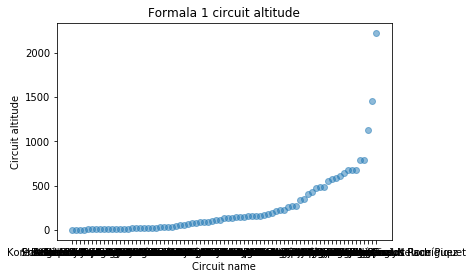

In [8]:
######graphe a modifier avec plus de detailles (rajouter une colonne continent, mettre diffrente couleur en fonction du continent, agradir le tableau pour avoir une absicse lisible)##### 
#graphe de description
plt.scatter(df_circuits['name'],df_circuits['altitude'], alpha=0.5)  # alpha chances the transparency
#titre et legendes
plt.title('Formala 1 circuit altitude')
plt.xlabel('Circuit name')
plt.ylabel('Circuit altitude')
#affichage du graph
plt.show()

A première vu le graph ci-dessus n'est pas très représentatif et compréhensible.
Pour rendre ce graph plus attractif,  nous allons créer une colonne qui donne le continent dans lequel se trouve le circuit.

In [9]:
#nous allons d'abord recuperer uniquement la colonne qui donne le pays
pays = df_circuits['country']
print("Il y a ligne", len(pays), "à la base")
#dans un second temps nous allons retirer les doublons 
#pays = set(pays)
pays = pays.drop_duplicates().reset_index()#gerons les duplications de pays comme dans un dataframe
pays = pays['country']
print("A present on voit qu'il y a", len(pays), "pays different dans en F1")

Il y a ligne 77 à la base
A present on voit qu'il y a 34 pays different dans en F1


A présent nous allons créer une liste qui regroupe tous le continent

In [10]:
continents = ['North_America', 'South_America', 'Africa', 'Asia', 'Oceania', 'Europe']

Nous allons maintenant créer un dictionnaire des continents avec les pays qui s'y trouvent

In [11]:
#dans cd dictionnaire la clé sera le pays et la value le continent pour des soucis pratiques
continents_dic = {
    'Azerbaijan' : 'Asia',
    'Korea' : 'Asia',
    'Russia' : 'Asia',
    'UAE' : 'Asia',
    'USA' : 'North_America',
    'Spain' : 'Europe',
    'China' : 'Asia',
    'Netherlands' : 'Europe',
    'Bahrain' : 'Asia',
    'Monaco' : 'Europe',
    'Argentina' : 'South_America',
    'Vietnam' : 'Asia',
    'Australia' : 'Oceania',
    'Canada' : 'North_America',
    'Saudi Arabia' : 'Asia',
    'South Africa' : 'Africa',
    'Singapore' : 'Asia',
    'Malaysia' : 'Asia',
    'Morocco' : 'Africa',
    'UK' : 'Europe',
    'Portugal' : 'Europe',
    'Belgium' : 'Europe',
    'Italy' : 'Europe',
    'Japan' : 'Asia',
    'Germany' : 'Europe',
    'France' : 'Europe',
    'Turkey' : 'Asia',
    'Sweden' : 'Europe',
    'India' : 'Asia',
    'Hungary' : 'Europe',
    'Switzerland' : 'Europe',
    'Austria' : 'Europe',
    'Brazil' : 'South_America',
    'Mexico' : 'North_America'
}
#representation des clee et value de 'continents_dic' 
print("Les clee de 'continents_dic' sont :\n",continents_dic.keys())
print('')
print("Les values de 'continents_dic' sont :\n",continents_dic.values())

Les clee de 'continents_dic' sont :
 dict_keys(['Azerbaijan', 'Korea', 'Russia', 'UAE', 'USA', 'Spain', 'China', 'Netherlands', 'Bahrain', 'Monaco', 'Argentina', 'Vietnam', 'Australia', 'Canada', 'Saudi Arabia', 'South Africa', 'Singapore', 'Malaysia', 'Morocco', 'UK', 'Portugal', 'Belgium', 'Italy', 'Japan', 'Germany', 'France', 'Turkey', 'Sweden', 'India', 'Hungary', 'Switzerland', 'Austria', 'Brazil', 'Mexico'])

Les values de 'continents_dic' sont :
 dict_values(['Asia', 'Asia', 'Asia', 'Asia', 'North_America', 'Europe', 'Asia', 'Europe', 'Asia', 'Europe', 'South_America', 'Asia', 'Oceania', 'North_America', 'Asia', 'Africa', 'Asia', 'Asia', 'Africa', 'Europe', 'Europe', 'Europe', 'Europe', 'Asia', 'Europe', 'Europe', 'Asia', 'Europe', 'Asia', 'Europe', 'Europe', 'Europe', 'South_America', 'North_America'])


In [12]:
#creation d'un dictionnaire qui attribue une couleur a un continent
couleur_dic = {
    'Asia' : '#F26230',
    'North_America' : '#223D96',
    'South_America' : '#653195',
    'Africa' : '#FEC810',
    'Oceania' : '#29AC46',
    'Europe' : '#eb242b'
}
#representation des clee et value de 'continents_dic' 
print("Les clee de 'couleur_dic' sont :\n",couleur_dic.keys())
print('')
print("Les values de 'couleur_dic' sont :\n",couleur_dic.values())

Les clee de 'couleur_dic' sont :
 dict_keys(['Asia', 'North_America', 'South_America', 'Africa', 'Oceania', 'Europe'])

Les values de 'couleur_dic' sont :
 dict_values(['#F26230', '#223D96', '#653195', '#FEC810', '#29AC46', '#eb242b'])


Il faut maintenant un introduire les valeurs de 'continents_dic' dans une nouvelle colonne de 'df_circuits'

In [13]:
#fonctin en 1 ligne (lambda) permetant d'assigner les valeurs de la nouvelle colonnes 'continents en finction de 'pays' 
df_circuits['continents'] = df_circuits.apply(lambda row: continents_dic[row['country']], axis = 1)
df_circuits['colors'] = df_circuits.apply(lambda row: couleur_dic[row['continents']], axis = 1)#dans cette colonnes les couleurs sont stoké sous forme de code
df_circuits.head()#on peut visualiser dans le df ci-dessous la nouvelle colonne 'continents' qui concorde bien avec 'pays'

,Ref_circuit,name,city,country,latitude,longitude,altitude,continents,colors
0,BAK,Baku City Circuit,Baku,Azerbaijan,40.3725,49.8533,-7,Asia,#F26230
1,yeongam,Korean International Circuit,Yeongam County,Korea,34.7333,126.4170,0,Asia,#F26230
2,sochi,Sochi Autodrom,Sochi,Russia,43.4057,39.9578,2,Asia,#F26230
3,yas_marina,Yas Marina Circuit,Abu Dhabi,UAE,24.4672,54.6031,3,Asia,#F26230
4,port_imperial,Port Imperial Street Circuit,New Jersey,USA,40.7769,-74.0111,4,North_America,#223D96


## Emplacement géographique des circuits

Réalisation d'un script qui affichera l'empacement de chaque circuit sur la carte, ainsi qu'un symbole qui sera plus ou moins gros en fonction du nombre de course s'étant tenu sur celui-ci

In [14]:
#creation d'une liste des latitudes et une autre liste pour les longitude
latitudes = df_circuits['latitude']
longitudes = df_circuits['longitude']
couleurs = df_circuits['colors']

#initialisation de la map
coords = (43.4057, 39.9578)
map = folium.Map(location=coords, tiles='OpenStreetMap')

for i in range(len(latitudes)):
    folium.Circle(
        location = (latitudes[i], longitudes[i]),
        radius = 1,#nb_course[i]*2,#nombre de course aillant eu lieu sur circuit
        color = couleurs[i],
        fill = True,
#         fill_color = couleurs[i]
    ).add_to(map)
    
map

Les point sont pratiquent lorsqu'on regarde la carte du monde dans ca globalité. Or lorsqu'on regarde à l'echelle d'un continent ou meme d'un pays les points sont trop petits.
Il faudrait donc différencier les cas et garder cette carte, en rajoutant une carte par continent avec des marqueur plus visible. 

# On va maintenant s'interesser au constructeur resulte 

dans un premier temps le but va etre de nettoyer le dataframe des resultats constructeurs.

In [15]:
df_constructor_results.head()

,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N


In [16]:
df_constructor_results.shape

(11820, 5)

In [17]:
df_constructors.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [18]:
nb_constru = df_constructors.shape

print("Dans l'histoire de la F1 il y a eu", nb_constru[0], "constructeurs qui se sont succedé de 1950 à aujourd'hui")

Dans l'histoire de la F1 il y a eu 211 constructeurs qui se sont succedé de 1950 à aujourd'hui
